# Henry Gu - Machine Learning - Final - Neural Networks

## Load Packages

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import get_colors, visualize_2d_classification, get_accuracy

## Moons Dataset

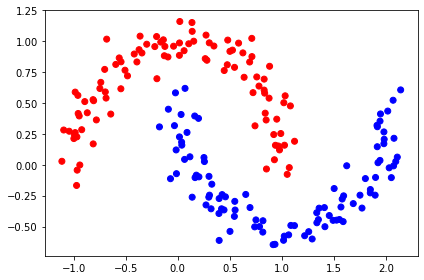

In [3]:
from sklearn.datasets import make_moons

n_samples=200
noise=0.1
seed=23

X, y = make_moons(n_samples=n_samples, noise=noise, random_state=seed)

# For consistent color plotting:
cmap = get_colors(y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.tight_layout()
plt.show()

### Data Processing

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 2), (40, 2), (160,), (40,))

### Building a Simple Perceptron

Build and Train Model

In [5]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from numpy.random import seed
import random as rn

rn.seed(12)
np.random.seed(12)
tf.compat.v1.set_random_seed(12)
seed(1)
tf.random.set_seed(12)

In [6]:
perceptron = Sequential()
perceptron.add(Dense(1, input_dim=2, activation='sigmoid')) 
perceptron.compile(loss="binary_crossentropy", optimizer=SGD(lr=0.001, decay=1e-7, momentum=.9))
history = perceptron.fit(X_train,y_train, validation_data= (X_test, y_test),epochs= 2000) 

C:\Users\henry\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/2000
5/5 [==============================] - 1s 112ms/step - loss: 0.6308 - val_loss: 0.6161
Epoch 2/2000
5/5 [==============================] - 0s 9ms/step - loss: 0.6288 - val_loss: 0.6139
Epoch 3/2000
5/5 [==============================] - 0s 12ms/step - loss: 0.6256 - val_loss: 0.6110
Epoch 4/2000
5/5 [==============================] - 0s 9ms/step - loss: 0.6218 - val_loss: 0.6078
Epoch 5/2000
5/5 [==============================] - 0s 12ms/step - loss: 0.6175 - val_loss: 0.6045
Epoch 6/2000
5/5 [==============================] - 0s 13ms/step - loss: 0.6131 - val_loss: 0.6012
Epoch 7/2000
5/5 [==============================] - 0s 12ms/step - loss: 0.6090 - val_loss: 0.5978
Epoch 8/2000
5/5 [==============================] - 0s 13ms/step - loss: 0.6045 - val_loss: 0.5944
Epoch 9/2000
5/5 [==============================] - 0s 12ms/step - loss: 0.6002 - val_loss: 0.5911
Epoch 10/2000
5/5 [==============================] - 0s 9ms/step - loss: 0.5959 - val_loss: 0.5879
Epoch 11/20

Model Evaluation

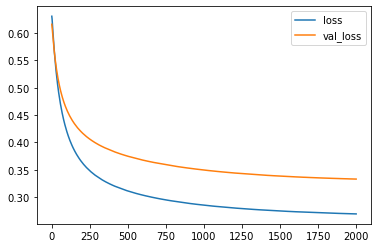

In [7]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()

In [8]:
from sklearn.metrics import accuracy_score,precision_score, recall_score

predictions = perceptron.predict(X_train)
predictions = np.where(predictions > 0.5, 1, 0)
print("Training Set Accuracy:", accuracy_score(predictions, y_train))

predictions_val = perceptron.predict(X_test)
predictions_val = np.where(predictions_val > 0.5, 1, 0)
print("Test Set Accuracy:", accuracy_score(predictions_val, y_test))

Training Set Accuracy: 0.86875
Test Set Accuracy: 0.85


Text(12.25, 0.5, 'Test')

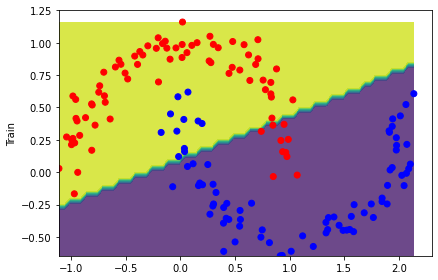

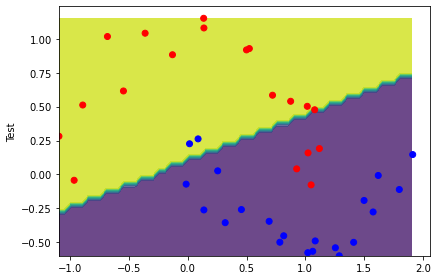

In [9]:
f, ax = visualize_2d_classification(perceptron, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(perceptron, X_test, y_test)
ax.set_ylabel("Test")

### Building a Better Neural Network

#### Data Processing

In [10]:
from tensorflow.keras.utils import to_categorical

y_train_vectorized = to_categorical(y_train)
y_test_vectorized = to_categorical(y_test)

In [11]:
print("Label | One-hot")
for i in range(10):
    print("{} | {}".format(y_train[i], y_train_vectorized[i]))

Label | One-hot
1 | [0. 1.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]
1 | [0. 1.]
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]
1 | [0. 1.]


In [12]:
y_train_vectorized.shape

(160, 2)

In [13]:
def build_classification_model():
    model = Sequential()
    model.add(Dense(10, input_dim=2, activation='relu'))   
    model.add(Dense(5, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
    model.compile(loss='categorical_crossentropy',
                  optimizer=sgd, metrics=["accuracy"])
    return model

In [14]:
model = build_classification_model()
history = model.fit(X_train,y_train_vectorized,epochs=600, validation_data=(X_test,y_test_vectorized),batch_size=10)

C:\Users\henry\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/600
16/16 [==============================] - 1s 30ms/step - loss: 0.7121 - accuracy: 0.3187 - val_loss: 0.7241 - val_accuracy: 0.2250
Epoch 2/600
16/16 [==============================] - 0s 6ms/step - loss: 0.7010 - accuracy: 0.3063 - val_loss: 0.7138 - val_accuracy: 0.1750
Epoch 3/600
16/16 [==============================] - 0s 6ms/step - loss: 0.6889 - accuracy: 0.3438 - val_loss: 0.7047 - val_accuracy: 0.3000
Epoch 4/600
16/16 [==============================] - 0s 6ms/step - loss: 0.6764 - accuracy: 0.5375 - val_loss: 0.6962 - val_accuracy: 0.4000
Epoch 5/600
16/16 [==============================] - 0s 4ms/step - loss: 0.6647 - accuracy: 0.5750 - val_loss: 0.6896 - val_accuracy: 0.4500
Epoch 6/600
16/16 [==============================] - 0s 6ms/step - loss: 0.6550 - accuracy: 0.6000 - val_loss: 0.6821 - val_accuracy: 0.5000
Epoch 7/600
16/16 [==============================] - 0s 5ms/step - loss: 0.6458 - accuracy: 0.6250 - val_loss: 0.6716 - val_accuracy: 0.5750
Epoch 8/600


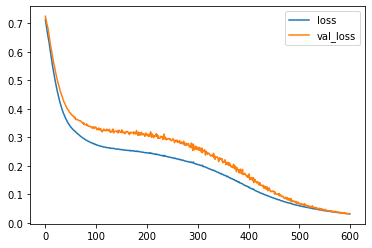

In [15]:
pd.DataFrame(history.history)[['loss','val_loss']].plot() 

In [16]:
# Print out accuracy
print("Training Set Accuracy:", get_accuracy(model, X_train, y_train))
print("Test Set Accuracy:", get_accuracy(model, X_test, y_test))

Training Set Accuracy: 1.0
Test Set Accuracy: 1.0


Text(12.25, 0.5, 'Test')

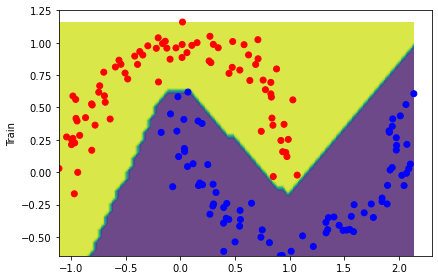

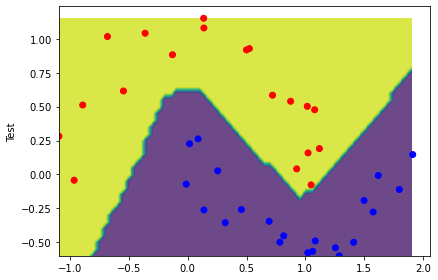

In [17]:
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")

## Income Dataset

### Data Preprocessing

In [18]:
from sklearn.model_selection import train_test_split

# Load your training data set and test data
income_df = pd.read_csv('income.csv')
train_df, test_df = train_test_split(income_df, test_size=0.15, shuffle=True, random_state=11)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# Clean the dataset: remove the rows with " ?"
train_df = train_df[~train_df.select_dtypes(['object']).eq(' ?').any(1)]
test_df = test_df[~test_df.select_dtypes(['object']).eq(' ?').any(1)]

In [19]:
# Split data into X and y
X = train_df.drop('income', axis=1)
y = train_df['income']

X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

In [20]:
from sklearn.preprocessing import StandardScaler
# standardize all the continuous features
col_names_continuous = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
X_scaler = StandardScaler()
X_scaler.fit(X[col_names_continuous])
X_new_continuous = pd.DataFrame(X_scaler.transform(X[col_names_continuous]), \
                 columns=col_names_continuous)

# convert all the categorical variables to dummy variables
from sklearn.preprocessing import OneHotEncoder
col_names_categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
X_enc = OneHotEncoder().fit(X[col_names_categorical])
X_new_categorical = X_enc.transform(X[col_names_categorical]).toarray()    
X_new_categorical = pd.DataFrame(X_new_categorical, columns=X_enc.get_feature_names(col_names_categorical))

# combine continuous and categorical variables into X
X = pd.concat([X_new_continuous, X_new_categorical], axis=1)

# repeat the above steps for the test data
# ensure we use the objects fit on the training data to transform test data
X_test_continuous = pd.DataFrame(X_scaler.transform(X_test[col_names_continuous]), \
                 columns=col_names_continuous)
X_test_categorical = X_enc.transform(X_test[col_names_categorical]).toarray()
X_test_categorical = pd.DataFrame(X_test_categorical, columns=X_enc.get_feature_names(col_names_categorical))    

X_test = pd.concat([X_test_continuous, X_test_categorical], axis=1)

# Encode y
y = pd.DataFrame(OneHotEncoder().fit_transform(y.to_numpy().reshape(-1,1)).toarray())
y_test = pd.DataFrame(OneHotEncoder().fit_transform(y_test.to_numpy().reshape(-1,1)).toarray())

In [21]:
X_train = X.iloc[:2400,:]
y_train = y.iloc[:2400]
X_val = X.iloc[2400:,:]
y_val = y.iloc[2400:]
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(2400, 102)
(503, 102)
(508, 102)
(2400, 2)
(503, 2)
(508, 2)


### Build and Train the Model

In [22]:
def build_final_model():
    model = Sequential()
    model.add(Dense(256, input_dim=102, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(2, activation='softmax'))
    
    sgd = SGD(lr=0.001, decay=1e-7, momentum=.9) 
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])   

    return model

In [23]:
model = build_final_model()
history_nn = model.fit(X_train, y_train, epochs=40, validation_data=(X_val,y_val))

C:\Users\henry\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/40
75/75 [==============================] - 2s 11ms/step - loss: 0.4286 - accuracy: 0.9038 - val_loss: 0.3711 - val_accuracy: 0.8827
Epoch 2/40
75/75 [==============================] - 0s 5ms/step - loss: 0.3022 - accuracy: 0.9104 - val_loss: 0.3507 - val_accuracy: 0.8827
Epoch 3/40
75/75 [==============================] - 0s 5ms/step - loss: 0.2882 - accuracy: 0.9104 - val_loss: 0.3336 - val_accuracy: 0.8827
Epoch 4/40
75/75 [==============================] - 0s 5ms/step - loss: 0.2774 - accuracy: 0.9104 - val_loss: 0.3184 - val_accuracy: 0.8827
Epoch 5/40
75/75 [==============================] - 0s 4ms/step - loss: 0.2617 - accuracy: 0.9104 - val_loss: 0.3051 - val_accuracy: 0.8827
Epoch 6/40
75/75 [==============================] - 0s 5ms/step - loss: 0.2518 - accuracy: 0.9104 - val_loss: 0.2946 - val_accuracy: 0.8827
Epoch 7/40
75/75 [==============================] - 0s 5ms/step - loss: 0.2425 - accuracy: 0.9104 - val_loss: 0.2869 - val_accuracy: 0.8847
Epoch 8/40
75/75 [=

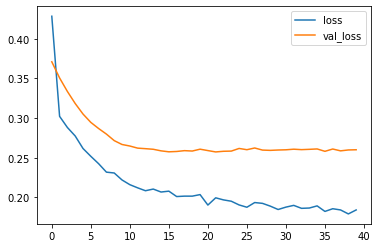

In [24]:
pd.DataFrame(history_nn.history)[['loss','val_loss']].plot()

### Evaluate Model

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred = np.argmax(model.predict(X_test), axis=-1)

print('Accuracy:', accuracy_score(y_test[1], y_pred))
print('Precision:', precision_score(y_test[1], y_pred))
print('Recall:', recall_score(y_test[1], y_pred)) 

Accuracy: 0.9094488188976378
Precision: 0.6111111111111112
Recall: 0.4074074074074074


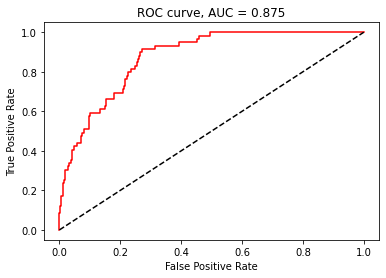

In [26]:
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from sklearn.metrics import auc

# compute the roc curve
fpr, tpr, thresholds = roc_curve(y_val[1], model.predict(X_val)[:,1])
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure()
title = f'ROC curve, AUC = {roc_auc:.3f}'
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(title)
plt.show()